In [14]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from PIL import Image
from sklearn.decomposition import PCA
%matplotlib inline

In [15]:
d_name = "../data/faces/rawdata"
images = []

for n_file in os.listdir(d_name):
    bytes_read = open(os.path.join(d_name, n_file), "rb").read()
    img_data = Image.frombytes('L', (128, 128), bytes_read)
    images.append(np.array(img_data).flatten())

images = np.array(images)

In [16]:
def plot_1_images(data, label="Image 1", ax=None):
    fn_shape = lambda X: X.reshape(128,128)
    fig = None
    if ax is None:
        fig, ax = plt.subplots(1,1, constrained_layout=True)
    ax.imshow(fn_shape(data))
    ax.set_title(label=label)
    return fig,ax

def plot_3_images(data,ix_1, ix_2 , ix_3):
    fn_shape = lambda X: X.reshape(128,128)
    fig, ax = plt.subplots(1,3, constrained_layout=True)
    ax[0].imshow(fn_shape(data[ix_1]))
    ax[0].set_title(label="Image %s"% ix_1)
    ax[1].imshow(fn_shape(data[ix_2]))
    ax[1].set_title(label="Image %s"% ix_2)
    ax[2].imshow(fn_shape(data[ix_2]))
    ax[2].set_title(label="Image %s "% ix_3)
    plt.show()

In [17]:
x_mean = images.mean(axis=0)
x_center = images - x_mean

## Mean Face

(<Figure size 640x480 with 1 Axes>, <Axes: title={'center': 'Image 1'}>)

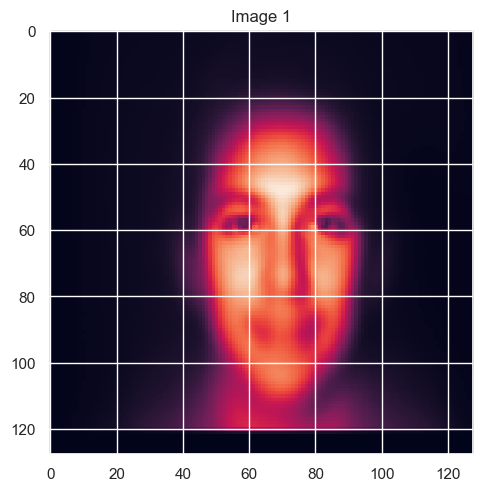

In [18]:
plot_1_images(x_mean)

In [19]:
pca = PCA(n_components=200)
# images x dim
x_reduced = pca.fit_transform(x_center)

In [20]:
eigen_values = pca.explained_variance_
eigen_faces = pca.components_
eigen_values

array([7.32420891e+06, 2.15718453e+06, 1.85813876e+06, 9.75416680e+05,
       8.90129813e+05, 7.89191985e+05, 6.21898507e+05, 4.19131866e+05,
       3.61422714e+05, 2.95051423e+05, 2.28587494e+05, 2.27095623e+05,
       1.94624139e+05, 1.86033651e+05, 1.70286094e+05, 1.57874095e+05,
       1.52472522e+05, 1.44768233e+05, 1.24995062e+05, 1.20067645e+05,
       1.17078293e+05, 1.11845380e+05, 1.04416679e+05, 1.01282734e+05,
       9.52964519e+04, 9.04634310e+04, 8.50867123e+04, 8.11756110e+04,
       7.71613532e+04, 7.37759042e+04, 6.95922083e+04, 6.71508889e+04,
       6.49471813e+04, 6.21272654e+04, 5.94283658e+04, 5.78440982e+04,
       5.48819168e+04, 5.44402291e+04, 5.20407659e+04, 4.99376255e+04,
       4.89796271e+04, 4.74574843e+04, 4.58922426e+04, 4.41544500e+04,
       4.29717864e+04, 4.14701614e+04, 4.09152576e+04, 4.03283111e+04,
       3.73473951e+04, 3.69807547e+04, 3.56148326e+04, 3.44818749e+04,
       3.36401596e+04, 3.33421668e+04, 3.21277065e+04, 3.05690224e+04,
      

## 1, 3 y 20 componentes

(<Figure size 640x480 with 1 Axes>, <Axes: title={'center': '1 eigenface'}>)

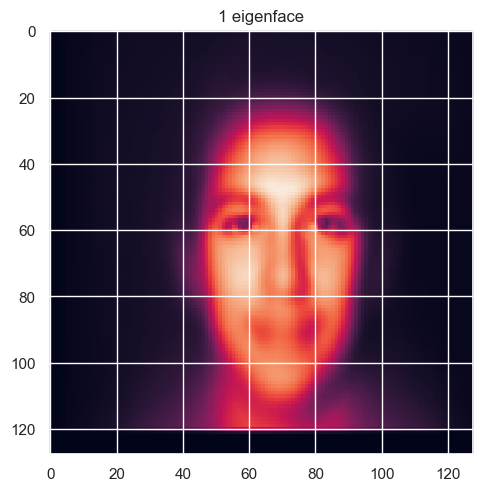

In [21]:
face_1 = x_mean + np.sum(np.dot(x_reduced[0].reshape(1,-1)[:,:1], eigen_faces[:1,:]), axis = 0)
plot_1_images(face_1, label= "1 eigenface")

(<Figure size 640x480 with 1 Axes>, <Axes: title={'center': '3 eigenfaces'}>)

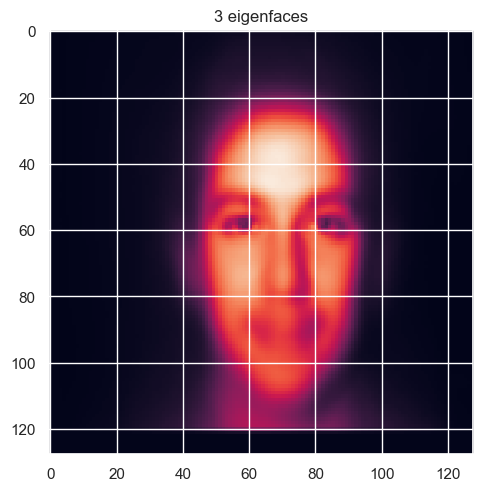

In [22]:
face_3 = x_mean + np.sum(np.dot(x_reduced[0].reshape(1,-1)[:,:3], eigen_faces[:3,:]), axis = 0)
plot_1_images(face_3, label= "3 eigenfaces")

(<Figure size 640x480 with 1 Axes>, <Axes: title={'center': '20 eigenfaces'}>)

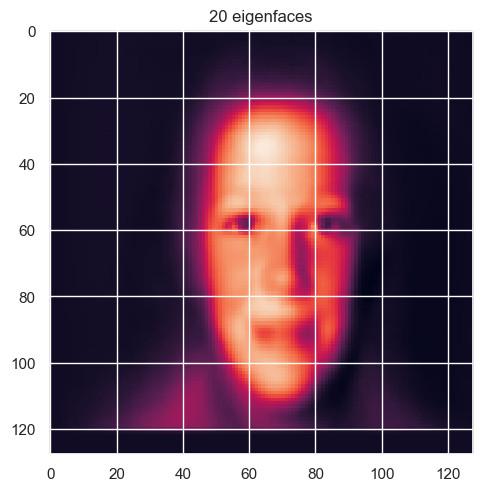

In [23]:
face_20 = x_mean + np.sum(np.dot(x_reduced[0].reshape(1,-1)[:,:20], eigen_faces[:20,:]), axis = 0)
plot_1_images(face_20, label= "20 eigenfaces")

## Explained variance

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': '177 eigenfaces or 0.95%'}>)

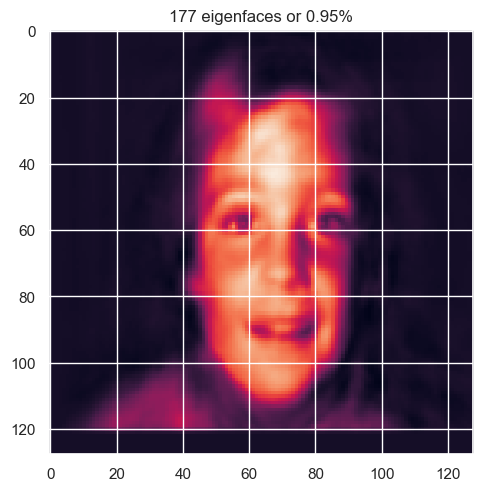

In [24]:
explained_variance = np.cumsum(pca.explained_variance_ratio_)
# 95 %
amount = np.where(explained_variance >= 0.95)[0][0] + 1
face = x_mean + np.sum(np.dot(x_reduced[0].reshape(1,-1)[:,:amount], eigen_faces[:amount,:]), axis=0)
plot_1_images(face, label= f"{amount} eigenfaces or {0.95}%")

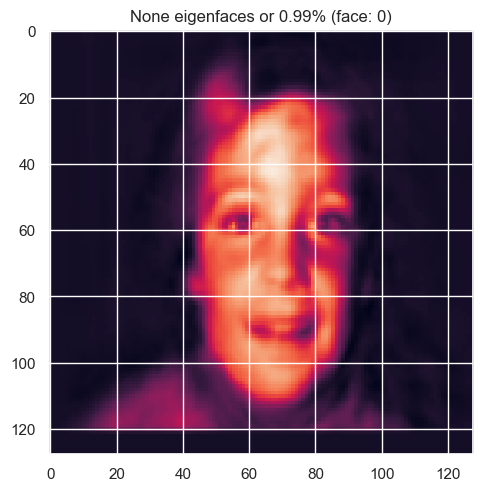

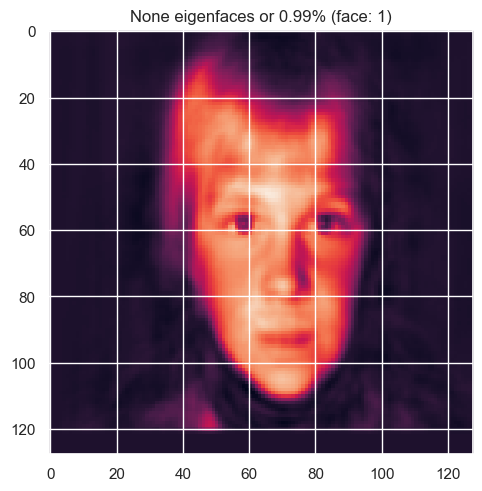

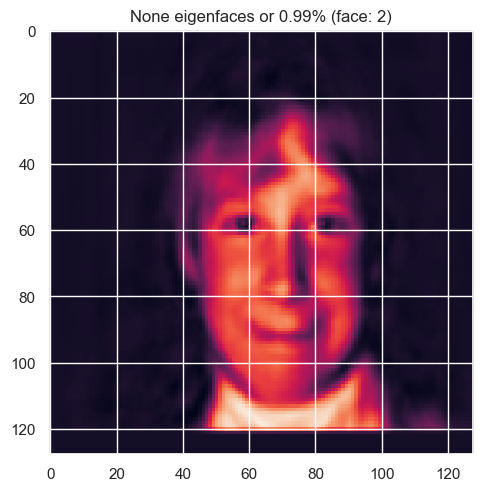

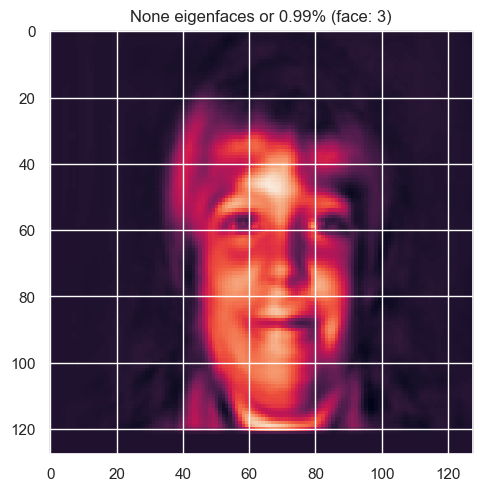

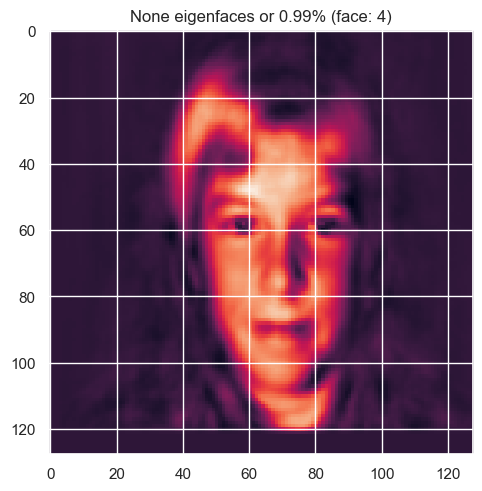

In [25]:
# 99 %
amount = (np.where(explained_variance >= 0.99)[0][0] + 1) if (len(np.where(explained_variance >= 0.99)[0]) > 0) else None

for index in range(0, 5):
    face = x_mean + np.sum(np.dot(x_reduced[index].reshape(1,-1)[:,:amount], eigen_faces[:amount,:]), axis=0)
    plot_1_images(face, label= f"{amount} eigenfaces or {0.99}% (face: {index})")

## Results
As the number of eigenfaces increases, the photo's quality improves. However, once we surpass the 177 eigenfaces threshold, the changes start to become barely noticeable. In line with this concept, an image with just one eigenface closely resembles the average face, whereas an image with 177 or more (representing 95% or higher) eigenfaces closely resembles the original image. This facial decomposition method is commonly employed in facial recognition and image manipulation.